# Email SPAM Filter - Natural Language Processing (NLP)

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


## Import Dataset

In [2]:
# Read .csv
email_df = pd.read_csv('emails_dataset.csv')
# Show first Rows
email_df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [3]:
# show a dataframe description
email_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


## Visualize Dataset

Spam Percentage: 23.88%
Ham Percentage: 76.12%


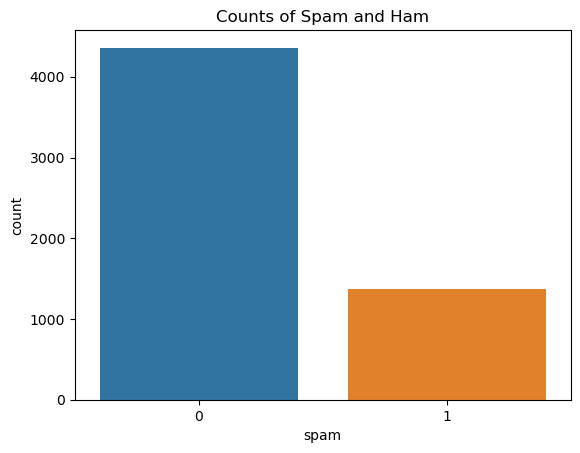

In [4]:
# Separate Spam and Ham (No Spam)
ham = email_df[email_df['spam']==0]
spam = email_df[email_df['spam']==1]

print(f"Spam Percentage: {100*len(spam)/len(email_df):.2f}%")
print(f"Ham Percentage: {100*len(ham)/len(email_df):.2f}%")

# Plot Data
plt.figure()
ax = sns.countplot(x = 'spam', data = email_df)
plt.title('Counts of Spam and Ham')
plt.show()

## Count Vectorizer

In [5]:
# Count Vectorizer on Spam Data
# this allow for sentiment analysis on the subject of emails
# creates matrix of occurances per text string

# Instantiate Vectorizer Object
vectorizer = CountVectorizer()

# Fit Vectorizer to Data
email_data_vectorized = vectorizer.fit_transform(email_df['text'])

# Occurance Count Vector
print(email_data_vectorized.toarray())
print(email_data_vectorized.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(5728, 37303)


## Model Training (Naive Bayes)

In [6]:
# Get Training Data (Count Vectorized) and Real Labels
X = email_data_vectorized
Y = email_df['spam'].values

# Divide Data into Training and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Naive Bayes Classifier Instance
NB_classifier = MultinomialNB()

# Fit Classifier
NB_classifier.fit(X=X_train, y=Y_train)

MultinomialNB()

## Evaluate Model

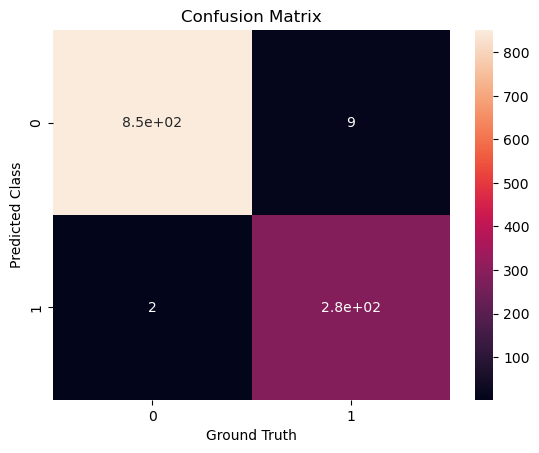

In [7]:
# Get Prediction for Y_Test
y_predict_test = NB_classifier.predict(X=X_test)
cm_test = confusion_matrix(y_true=Y_test, y_pred=y_predict_test)

plt.figure()
sns.heatmap(cm_test, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Ground Truth')
plt.ylabel('Predicted Class')
plt.show()


In [8]:
# Show Classification Report
print(classification_report(y_true=Y_test, y_pred=y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       860
           1       0.97      0.99      0.98       286

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



## Manually typed Test

In [9]:
# Manual Sample 
print("Manual Sample (Not Test Set) \n\n")
test_sample = ['Free Money!!','A prince is looking to give you','Hi Kim, please contact me for further information']
# Count Vectorize the manual sample
testing_sample_vectorized_data = vectorizer.transform(test_sample)

# Predict using NB Classifier
test_prediction = NB_classifier.predict(testing_sample_vectorized_data)
# Results
print("Test 1: ",test_sample[0],'\nTest 2: ',test_sample[1],'\nTest 3: ',test_sample[2])
print('=======================================================================')
print(f"----- 0: Ham (No Spam)\n----- 1: Spam\n\nTest 1: {test_prediction[0]}\nTest 2: {test_prediction[1]}\nTest 3: {test_prediction[2]}")

Manual Sample (Not Test Set) 


Test 1:  Free Money!! 
Test 2:  A prince is looking to give you 
Test 3:  Hi Kim, please contact me for further information
----- 0: Ham (No Spam)
----- 1: Spam

Test 1: 1
Test 2: 1
Test 3: 0
